In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.data", sep='\t', names=["user id", "movie id", "rating", "timestamp"])

In [3]:
df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
dfgenre = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.genre")

In [5]:
dfgenre

,unknown|0
0,Action|1
1,Adventure|2
2,Animation|3
3,Children's|4
4,Comedy|5
5,Crime|6
6,Documentary|7
7,Drama|8
8,Fantasy|9
9,Film-Noir|10


In [6]:
column_names = [
    "movie id", "movie title", "release date", "video release date",
    "IMDb URL", "unknown", "Action", "Adventure", "Animation",
    "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
    "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
    "Thriller", "War", "Western"
]

In [7]:
dfitems = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.item", sep='|', names=column_names, encoding='latin-1')

In [8]:
movie_titles = dfitems['movie title'].tolist()

In [9]:
cleaned_titles = [title.rsplit(' (', 1)[0] for title in movie_titles]

# Print the cleaned titles
print(cleaned_titles)

['Toy Story', 'GoldenEye', 'Four Rooms', 'Get Shorty', 'Copycat', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Twelve Monkeys', 'Babe', 'Dead Man Walking', 'Richard III', 'Seven (Se7en)', 'Usual Suspects, The', 'Mighty Aphrodite', 'Postino, Il', "Mr. Holland's Opus", 'French Twist (Gazon maudit)', 'From Dusk Till Dawn', 'White Balloon, The', "Antonia's Line", 'Angels and Insects', 'Muppet Treasure Island', 'Braveheart', 'Taxi Driver', 'Rumble in the Bronx', 'Birdcage, The', 'Brothers McMullen, The', 'Bad Boys', 'Apollo 13', 'Batman Forever', 'Belle de jour', 'Crimson Tide', 'Crumb', 'Desperado', 'Doom Generation, The', 'Free Willy 2: The Adventure Home', 'Mad Love', 'Nadja', 'Net, The', 'Strange Days', 'To Wong Foo, Thanks for Everything! Julie Newmar', 'Billy Madison', 'Clerks', 'Disclosure', 'Dolores Claiborne', 'Eat Drink Man Woman', 'Exotica', 'Ed Wood', 'Hoop Dreams', 'I.Q.', 'Star Wars', 'Legends of the Fall', 'Madness of King George, The', 'Natural Born Killers', 'Outbreak'

In [10]:
dfitems.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_movies = dfitems[['movie id','movie title']]
df_movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df_merged = pd.merge(df, df_movies, how='inner', on='movie id')
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [13]:
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [14]:
movie_user_counts = df_merged.groupby(['movie title', 'user id']).size().reset_index(name='count')
movie_user_counts_sorted = movie_user_counts.sort_values('count', ascending=False)

movie_user_counts_sorted

,movie title,user id,count
16556,Chasing Amy (1997),268,2
16557,Chasing Amy (1997),269,2
11802,Body Snatchers (1993),524,2
11803,Body Snatchers (1993),537,2
44856,"Ice Storm, The (1997)",354,2
...,...,...,...
99672,"Young Poisoner's Handbook, The (1995)",861,1
99673,"Young Poisoner's Handbook, The (1995)",865,1
99674,"Young Poisoner's Handbook, The (1995)",868,1
99675,"Young Poisoner's Handbook, The (1995)",871,1


In [15]:
df_merged[(df_merged['movie title'] == 'Body Snatchers (1993)') & (df_merged['user id'] == 833)]


,user id,movie id,rating,timestamp,movie title
66833,833,670,1,875124428,Body Snatchers (1993)
68445,833,573,1,875223976,Body Snatchers (1993)


In [16]:

refined_dataset = df_merged.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [17]:

num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


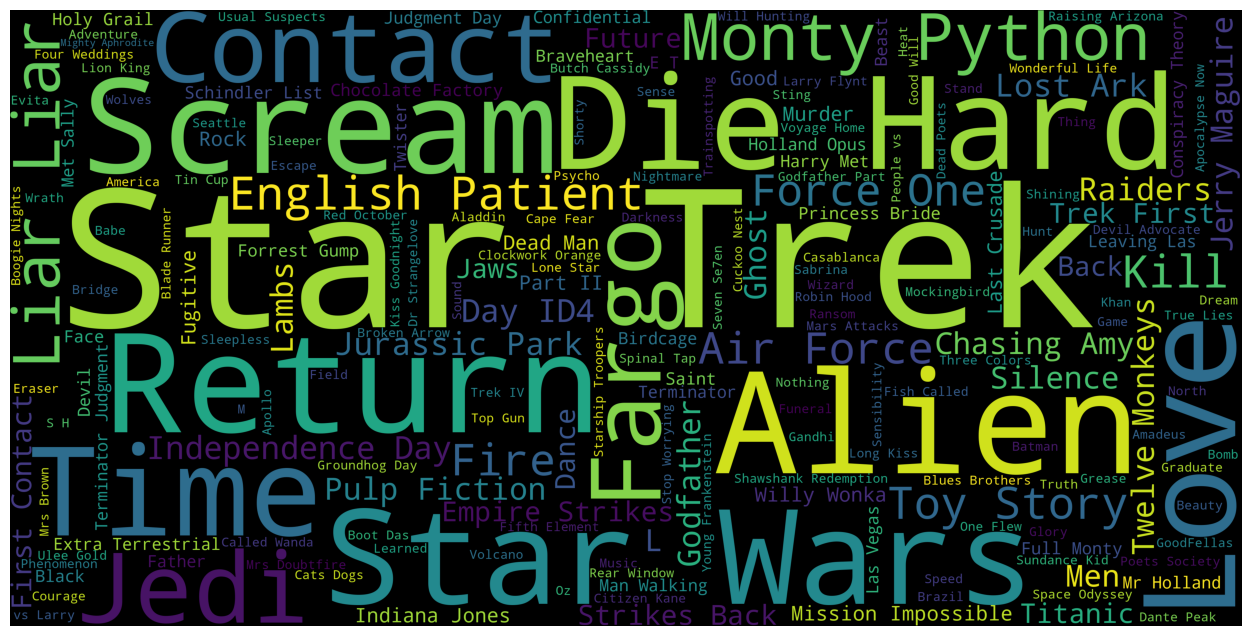

In [18]:
# Import new libraries
%matplotlib inline
import matplotlib.pyplot as plt

import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
df_merged['movie title'] = df_merged['movie title'].fillna("").astype('str')
title_corpus = ' '.join(df_merged['movie title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

C:\Users\gurut\AppData\Local\Temp\ipykernel_12104\4278949494.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['rating'].fillna(df_merged['rating'].median()))


<Axes: xlabel='rating', ylabel='Density'>

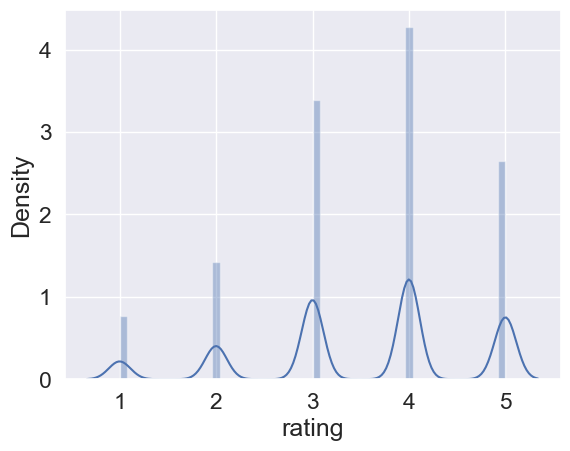

In [19]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(df_merged['rating'].fillna(df_merged['rating'].median()))